In [1]:
# Import dependencies
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

## Basics of spectra (pre)processing

In [3]:
### load data
data = pd.read_csv('data/classification_spec.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375
0,400.000000,402.000000,404.000000,406.000000,408.000000,410.000000,412.000000,414.000000,416.000000,418.000000,...,3132.000000,3134.000000,3136.000000,3138.000000,3140.000000,3142.000000,3144.000000,3146.000000,3148.000000,3150.000000
1,48.707691,43.903876,27.073055,24.885715,35.267428,28.747168,10.897972,-2.785735,-2.026663,16.584663,...,1.461492,9.578739,9.885035,2.738687,-3.678894,-1.371132,10.765852,14.747017,14.176111,12.472059
2,64.819631,71.834878,76.930678,72.947486,61.356842,52.731382,47.498447,42.952666,38.679265,34.216845,...,12.914044,23.771412,9.624409,16.555127,19.294024,11.702179,29.214662,16.941762,15.243206,24.001155
3,63.806536,53.339466,69.535666,81.203678,69.883255,57.005251,53.167996,58.120419,56.786181,30.006636,...,-1.126209,4.635422,5.610834,17.026027,19.112369,4.716200,-4.503231,5.153161,17.483822,15.932627
4,71.808476,69.759851,61.623413,47.671625,35.815485,36.499904,33.890724,13.311474,-0.071387,19.149030,...,16.671954,9.873609,-0.059435,-0.503562,9.518001,18.360571,18.011997,13.706083,11.249410,10.961979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,62.912643,55.230136,47.776575,58.476725,79.586173,77.035613,58.505852,44.106047,41.144327,49.485840,...,20.368072,30.955161,18.905626,7.022299,5.282636,10.749624,20.061126,12.168057,11.047212,14.458266
497,72.889767,67.765892,61.674507,61.187316,67.015179,73.109183,73.306217,64.523989,57.408627,61.557496,...,5.571161,15.184689,25.312820,21.031022,11.163505,12.217696,19.557979,9.164086,-6.000943,-3.263111
498,56.354891,65.886429,65.962519,51.977451,41.932582,46.059463,47.799283,38.419786,25.620396,15.818723,...,25.136068,19.389890,1.606457,-1.834222,11.175519,22.766656,8.219274,4.519288,12.655316,9.576864
499,47.873533,30.104165,10.732846,7.595859,18.478769,21.598678,17.004571,11.717571,12.241276,21.636772,...,3.417620,5.780569,1.604167,4.562219,9.356381,7.006262,12.550253,5.948657,-0.716595,4.211659


In [5]:
### load labels
meta = pd.read_csv('data/classification_meta.csv', header=0)
meta

,label,batch
0,S-cohnii,3_Batch
1,E-coli,6_Batch
2,R-terrigena,9_Batch
3,P-stutzeri,7_Batch
4,S-warneri,5_Batch
...,...,...
495,R-terrigena,3_Batch
496,S-cohnii,7_Batch
497,P-stutzeri,1_Batch
498,L-innocua,9_Batch


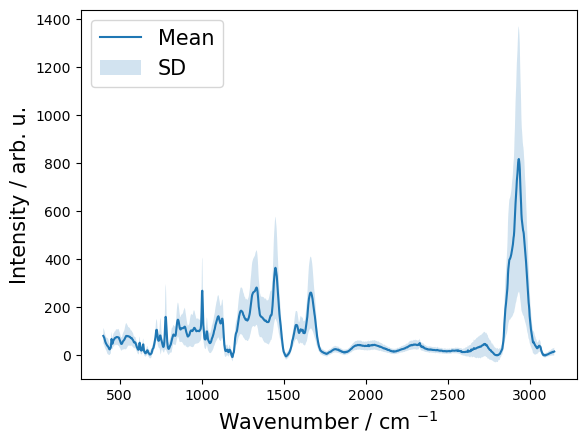

In [6]:
### plot data
wn = np.array(data.iloc[0, :])
spec = np.array(data.iloc[1:, :])
labels = np.array(meta['label'])
batches = np.array(meta['batch'])

spec_mean = spec.mean(axis=0)
spec_sd = spec.std(axis=0)

plt.plot(wn, spec_mean, label='Mean')
plt.fill_between(wn, spec_mean - spec_sd, 
                 spec_mean + spec_sd, 
                 alpha = 0.2, label='SD')
plt.xlabel("Wavenumber / cm $^{-1}$", fontsize=15)
plt.ylabel('Intensity / arb. u.', fontsize=15)
plt.legend(fontsize=15)

### Normalization
Important to:
* reduce the possible intensity fluctuations coming from e.g. laser power, focusing status, etc.
* obain a more stable model, expecially deep learning models, as they work optimally with values within 0-1

Different ways of normalization:
* divide by square root of sum of squares (l2 normalization)
* divide by maximum
* divide by median/mean
* divide by range (maximum-minimum)

All above options can be done based on the full spectral range, part of the spectral range, or a single band.             

In [7]:
### here we will do l2 normalization excluding the silent region
ix_wn = (wn<1800) | (wn>2800)
wn = wn[ix_wn]
spec = spec[:, ix_wn]

spec = np.row_stack([spec[i, :]/np.sqrt(np.sum(spec[i, :]**2)) for i in range(spec.shape[0])])

/tmp/ipykernel_961/4141268368.py:6: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  spec = np.row_stack([spec[i, :]/np.sqrt(np.sum(spec[i, :]**2)) for i in range(spec.shape[0])])


Text(0.5, 1.0, 'After l2 normalization')

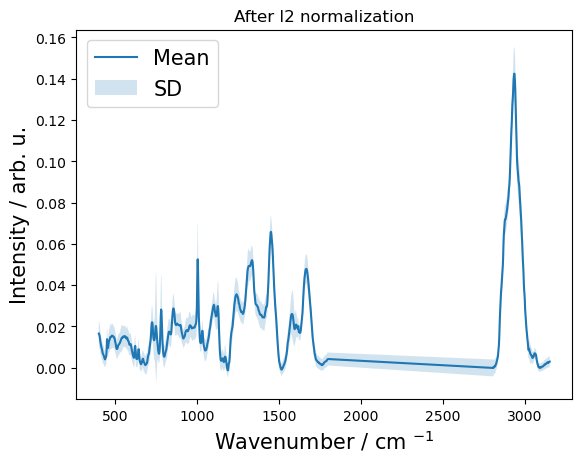

In [8]:
spec_mean = spec.mean(axis=0)
spec_sd = spec.std(axis=0)

plt.plot(wn, spec_mean, label='Mean')
plt.fill_between(wn, spec_mean - spec_sd, 
                 spec_mean + spec_sd, 
                 alpha = 0.2, label='SD')
plt.xlabel("Wavenumber / cm $^{-1}$", fontsize=15)
plt.ylabel('Intensity / arb. u.', fontsize=15)
plt.legend(fontsize=15)
plt.title('After l2 normalization')

### Feature extraction / dimension reduction

Important to reduce the redundancy in the data, which often leads to better performance for subsequent analysis (e.g., clustering, classification, etc.)

#### Principal component analysis: unsupervised dimension reduction

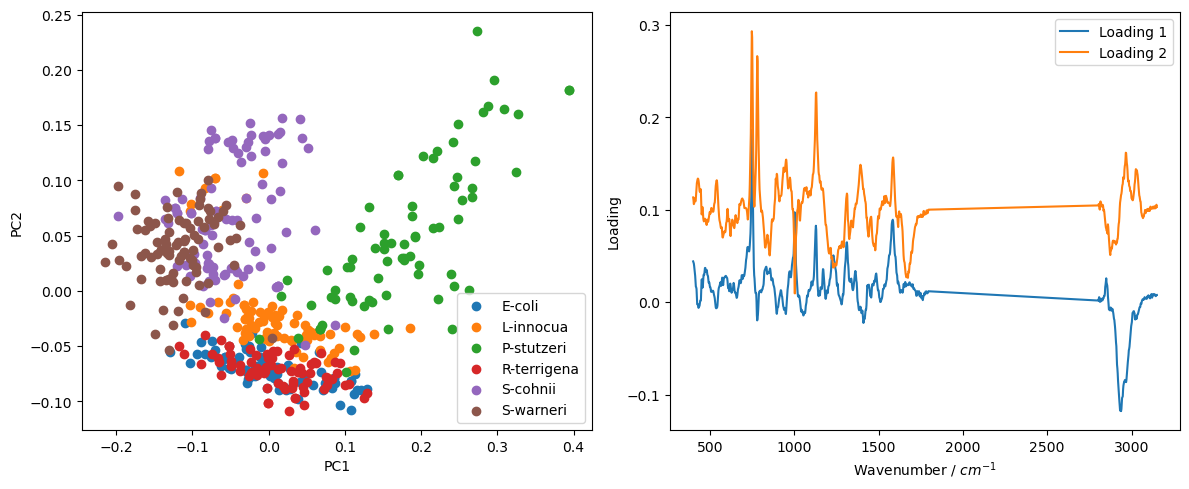

In [9]:
pca_spec = PCA(n_components=10)
pca_spec.fit(spec)
pca_scores = pca_spec.transform(spec)
pca_loadings = pca_spec.components_

uni_labels = np.unique(labels)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, l in enumerate(uni_labels):
    ax[0].scatter(pca_scores[labels==l, 0], pca_scores[labels==l, 1], label=l)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].legend()

ax[1].plot(wn, pca_loadings[0, :], label='Loading 1')
ax[1].plot(wn, pca_loadings[1, :]+0.1, label='Loading 2')
ax[1].set_xlabel('Wavenumber / $cm^{-1}$')
ax[1].set_ylabel('Loading')
ax[1].legend()

plt.tight_layout()
plt.show()

### Partial least squares: supservised dimension reduction

In [10]:
### transfer labels into dummy vectors to perform regression
y_dummy = np.zeros((spec.shape[0], len(uni_labels)))
for i, l in enumerate(uni_labels):
    y_dummy[labels==l, i] = 1

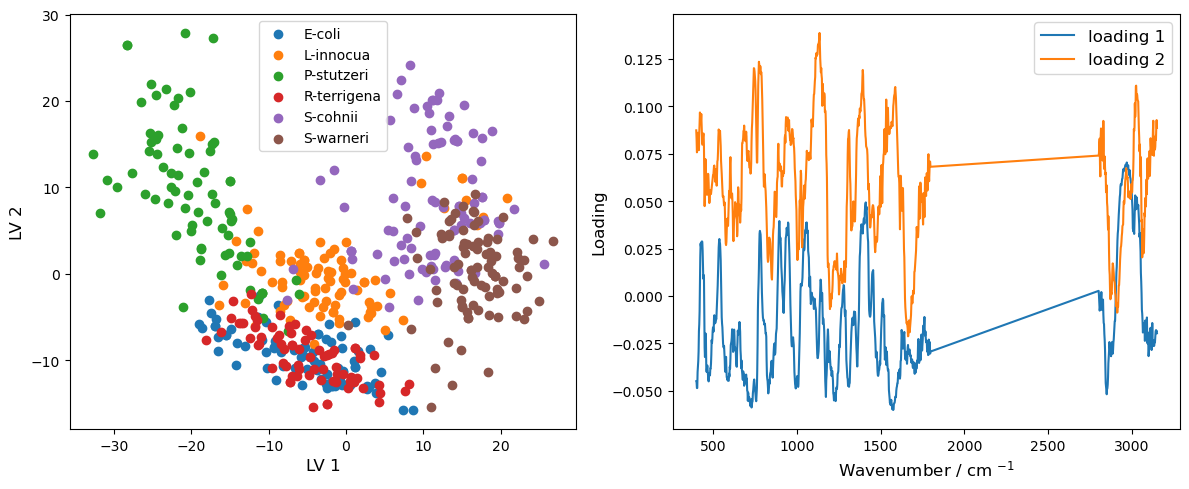

In [11]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=10)
pls.fit(spec, y_dummy)

pls_scores = pls.transform(spec)
pls_loadings = pls.x_rotations_

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, l in enumerate(uni_labels):
    ax[0].scatter(pls_scores[labels==l, 0], pls_scores[labels==l, 1], label=l)
ax[0].set_xlabel('LV 1', fontsize=12)
ax[0].set_ylabel('LV 2', fontsize=12)
ax[0].legend()

ax[1].plot(wn, pls_loadings[:, 0], label='loading 1')
ax[1].plot(wn, pls_loadings[:, 1]+0.05, label='loading 2')
ax[1].set_xlabel("Wavenumber / cm $^{-1}$", fontsize=12)
ax[1].set_ylabel('Loading', fontsize=12)
ax[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

### Clustering:

In [12]:
## PCA + k-Means
from sklearn.cluster import KMeans

n_cluster = 5  
kmeans_spec = KMeans(n_clusters=n_cluster, random_state=0).fit(spec)
cluster_spec = kmeans_spec.labels_
center_spec = kmeans_spec.cluster_centers_

kmeans_pca = KMeans(n_clusters=n_cluster, random_state=0).fit(pca_scores)
cluster_pca = kmeans_pca.labels_
center_pca = []
for i in np.unique(cluster_pca):
    center_pca.append(np.mean(spec[cluster_pca==i, :], axis=0))
    
center_pca = np.row_stack(center_pca)

/tmp/ipykernel_961/4291165655.py:15: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  center_pca = np.row_stack(center_pca)


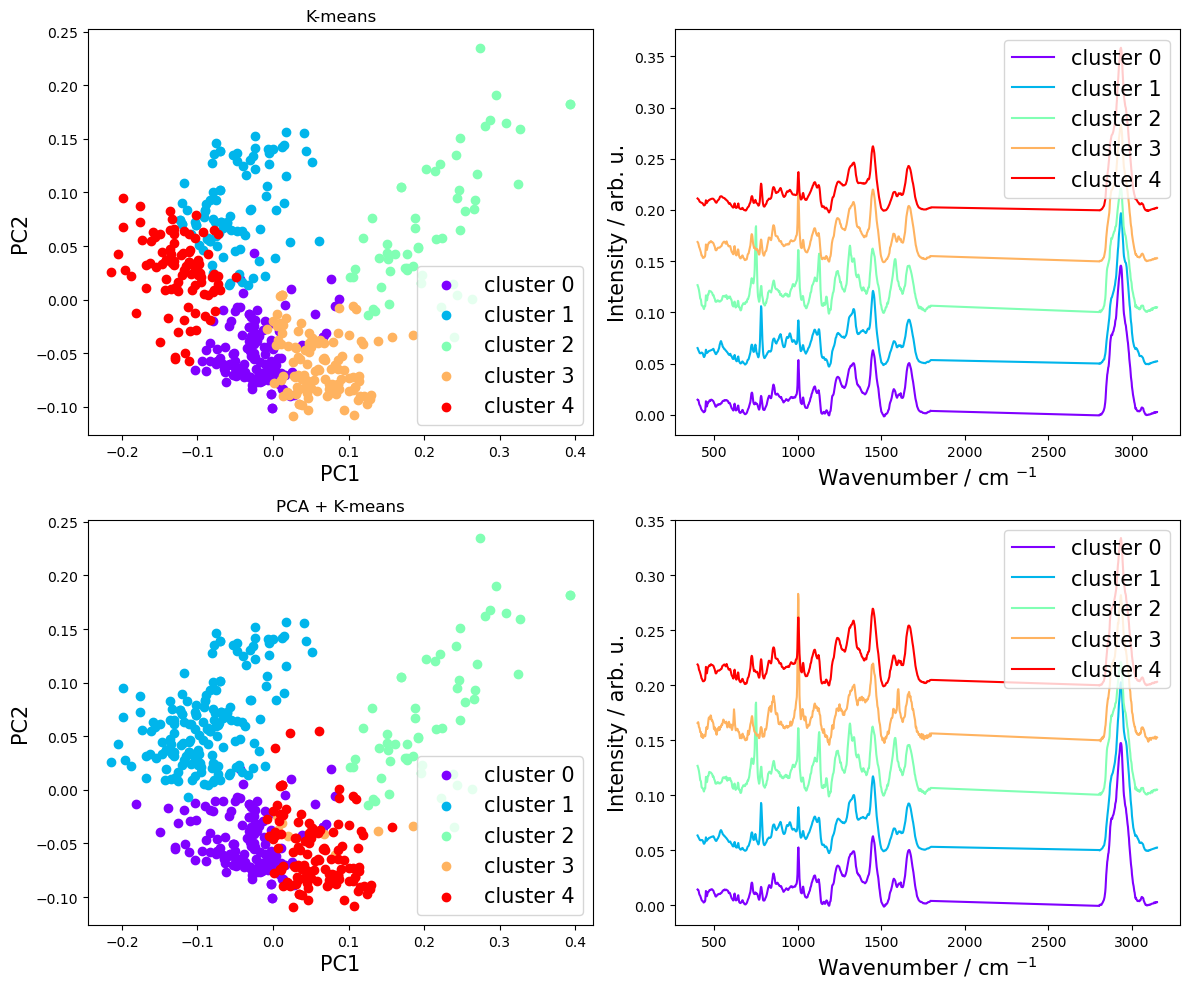

In [13]:
import matplotlib as mpl

colors = mpl.colormaps['rainbow']
colors = colors(np.linspace(0, 1, n_cluster))

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i in range(n_cluster):
    ax[0, 0].scatter(pca_scores[cluster_spec==i, 0], pca_scores[cluster_spec==i, 1], color=colors[i], label='cluster '+str(i))
    ax[1, 0].scatter(pca_scores[cluster_pca==i, 0], pca_scores[cluster_pca==i, 1], color=colors[i], label='cluster '+str(i))
ax[0, 0].set_xlabel("PC1", fontsize=15)
ax[0, 0].set_ylabel('PC2', fontsize=15)   
ax[0, 0].legend(fontsize=15)
ax[0, 0].set_title('K-means')

ax[1, 0].set_xlabel("PC1", fontsize=15)
ax[1, 0].set_ylabel('PC2', fontsize=15)   
ax[1, 0].legend(fontsize=15)
ax[1, 0].legend(fontsize=15)
ax[1, 0].set_title('PCA + K-means')

gap = 0.05
for i in range(n_cluster):
    ax[0, 1].plot(wn, center_spec[i, :] + i*gap, color=colors[i], label='cluster '+str(i))
    ax[1, 1].plot(wn, center_pca[i, :] + i*gap, color=colors[i], label='cluster '+str(i))
ax[0, 1].set_xlabel("Wavenumber / cm $^{-1}$", fontsize=15)
ax[0, 1].set_ylabel('Intensity / arb. u.', fontsize=15)   
ax[0, 1].legend(fontsize=15)    
ax[1, 1].set_xlabel("Wavenumber / cm $^{-1}$", fontsize=15)
ax[1, 1].set_ylabel('Intensity / arb. u.', fontsize=15)   
ax[1, 1].legend(fontsize=15)   

plt.tight_layout()
plt.show()

### hierarchical clustering analysis (HCA)

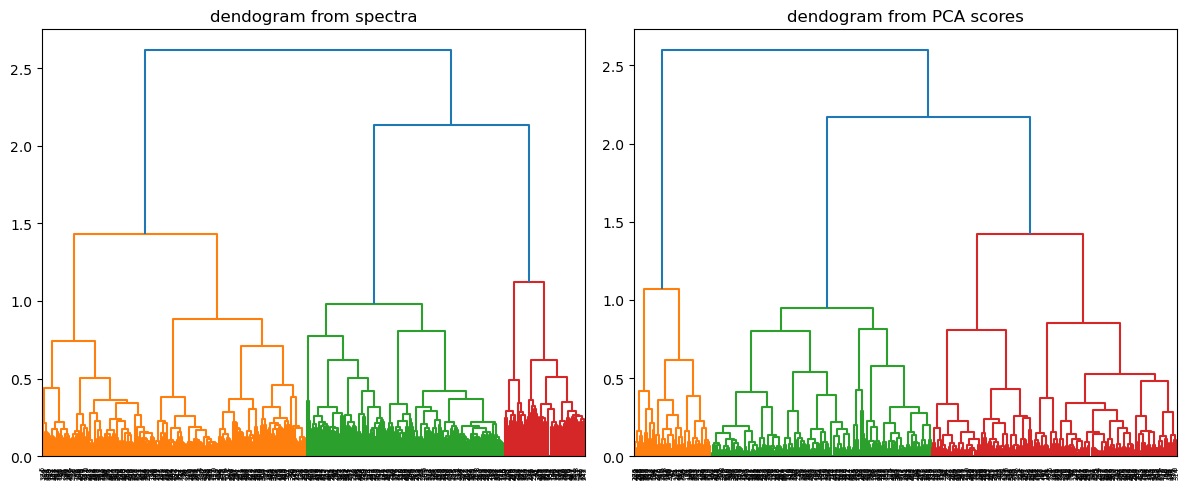

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
linkage_data = linkage(spec, method='ward', metric='euclidean')
dendrogram(linkage_data, ax=ax[0])
ax[0].set_title('dendogram from spectra')
ax[0].set_xticks
linkage_data = linkage(pca_scores, method='ward', metric='euclidean')
dendrogram(linkage_data, ax=ax[1])
ax[1].set_title('dendogram from PCA scores')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

hca_spec = AgglomerativeClustering(n_clusters=n_cluster, metric='euclidean', linkage='ward')
cluster_hca_spec = hca_spec.fit_predict(spec) 
center_hca_spec = []
for i in np.unique(cluster_hca_spec):
    center_hca_spec.append(np.mean(spec[cluster_hca_spec==i, :], axis=0))
    
center_hca_spec = np.row_stack(center_hca_spec)


hca_pca = AgglomerativeClustering(n_clusters=n_cluster, metric='euclidean', linkage='ward')
cluster_hca_pca = hca_pca.fit_predict(pca_scores) 
center_hca_pca = []
for i in np.unique(cluster_hca_pca):
    center_hca_pca.append(np.mean(spec[cluster_hca_pca==i, :], axis=0))
    
center_hca_pca = np.row_stack(center_hca_pca)

/tmp/ipykernel_961/3544320838.py:9: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  center_hca_spec = np.row_stack(center_hca_spec)
/tmp/ipykernel_961/3544320838.py:18: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  center_hca_pca = np.row_stack(center_hca_pca)


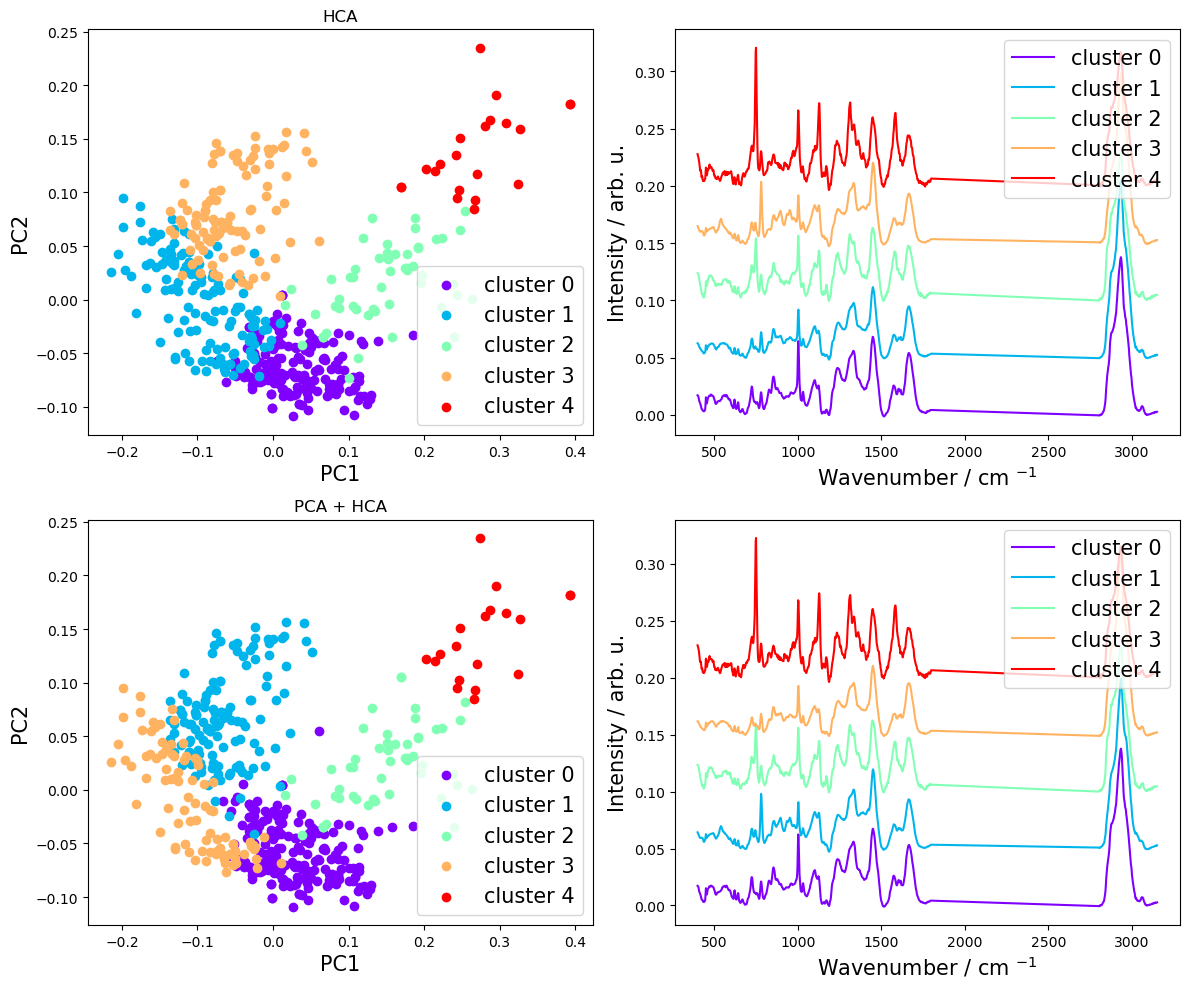

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i in range(n_cluster):
    ax[0, 0].scatter(pca_scores[cluster_hca_spec==i, 0], pca_scores[cluster_hca_spec==i, 1], color=colors[i], label='cluster '+str(i))
    ax[1, 0].scatter(pca_scores[cluster_hca_pca==i, 0], pca_scores[cluster_hca_pca==i, 1], color=colors[i], label='cluster '+str(i))
ax[0, 0].set_xlabel("PC1", fontsize=15)
ax[0, 0].set_ylabel('PC2', fontsize=15)   
ax[0, 0].legend(fontsize=15)
ax[0, 0].set_title('HCA')

ax[1, 0].set_xlabel("PC1", fontsize=15)
ax[1, 0].set_ylabel('PC2', fontsize=15)   
ax[1, 0].legend(fontsize=15)
ax[1, 0].legend(fontsize=15)
ax[1, 0].set_title('PCA + HCA')

gap = 0.05
for i in range(n_cluster):
    ax[0, 1].plot(wn, center_hca_spec[i, :] + i*gap, color=colors[i], label='cluster '+str(i))
    ax[1, 1].plot(wn, center_hca_pca[i, :] + i*gap, color=colors[i], label='cluster '+str(i))
ax[0, 1].set_xlabel("Wavenumber / cm $^{-1}$", fontsize=15)
ax[0, 1].set_ylabel('Intensity / arb. u.', fontsize=15)   
ax[0, 1].legend(fontsize=15)    
ax[1, 1].set_xlabel("Wavenumber / cm $^{-1}$", fontsize=15)
ax[1, 1].set_ylabel('Intensity / arb. u.', fontsize=15)   
ax[1, 1].legend(fontsize=15)   

plt.tight_layout()
plt.show()

### classification

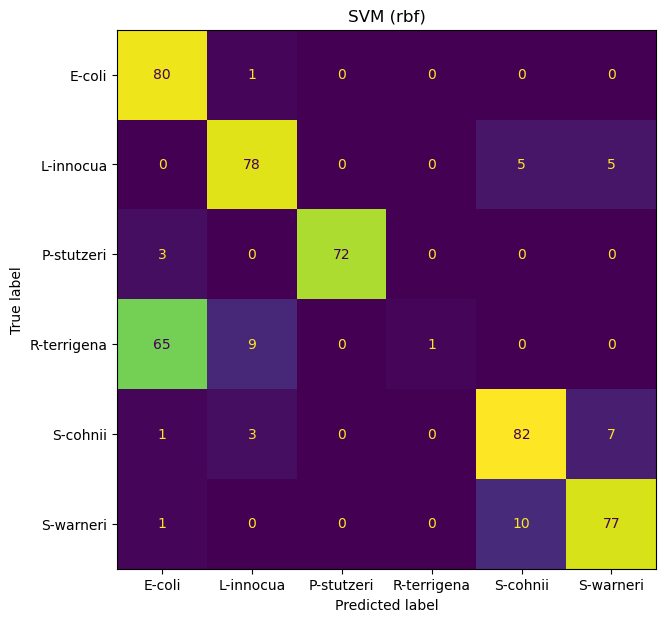

In [20]:
### nonlinear classification
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf_svm = svm.SVC(C=1.0, kernel='rbf')
clf_svm.fit(spec, labels)
pred = clf_svm.predict(spec)

cmat_svm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat_svm, display_labels=np.unique(labels))
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
disp.plot(ax=ax, colorbar=False)
plt.title('SVM (rbf)')
plt.show()

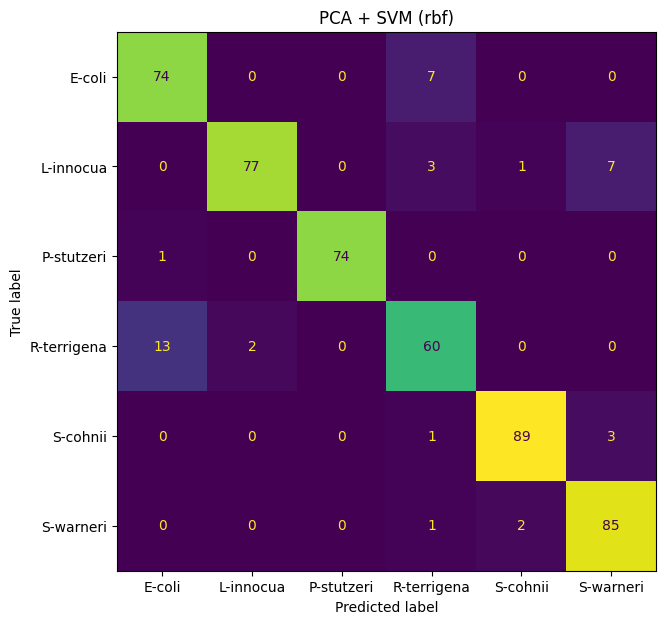

In [32]:
### nonlinear classification
clf_svm = svm.SVC(C=1.0, kernel='rbf')
clf_svm.fit(pca_scores, labels)
pred = clf_svm.predict(pca_scores)
cmat_svm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat_svm, display_labels=np.unique(labels))
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
disp.plot(ax=ax, colorbar=False)
plt.title('PCA + SVM (rbf)')
plt.show()

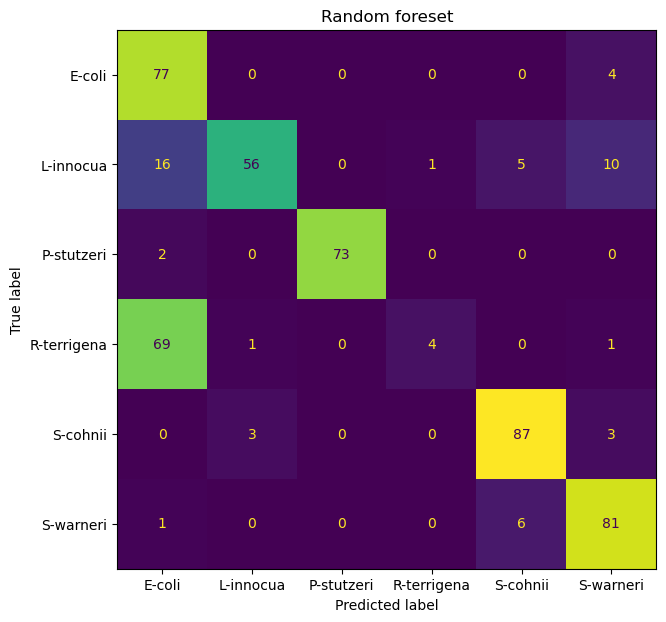

In [21]:
### random forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rf.fit(spec, labels)

pred = clf_rf.predict(spec)
cmat_svm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat_svm, display_labels=np.unique(labels))
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
disp.plot(ax=ax, colorbar=False)
plt.title('Random foreset')
plt.show()

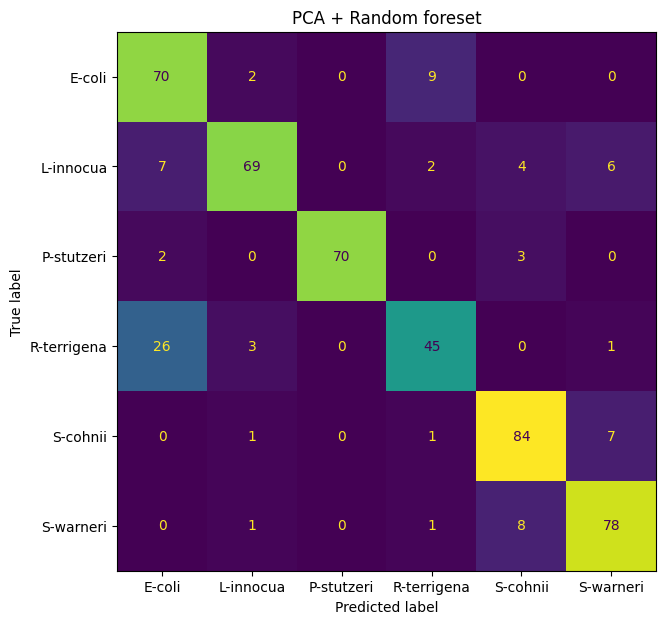

In [34]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rf.fit(pca_scores, labels)

pred = clf_rf.predict(pca_scores)
cmat_svm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat_svm, display_labels=np.unique(labels))
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
disp.plot(ax=ax, colorbar=False)
plt.title('PCA + Random foreset')
plt.show()

### Pipeline with cross-validation

In [22]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import balanced_accuracy_score

class Classify(object):
    def __init__(self, spec, labels, batches):
        self.spec = spec
        self.labels = labels
        self.batches = batches
    
    def model(self, ix_train, ix_test, nPC=15, method=['LDA', 'SVM', 'RF'], cost=2, ntrees=100, max_depth=2):
        m_PCA = PCA(n_components = nPC).fit(self.spec[ix_train, :])
        
        scr_train = m_PCA.transform(self.spec[ix_train, :])
        scr_test = m_PCA.transform(self.spec[ix_test, :])

        if 'SVM' in method:
            model = svm.SVC(C=cost, class_weight='balanced')
        elif 'RF' in method:
            model = RandomForestClassifier(n_estimators=ntrees, max_depth=2, random_state=0)
        else:
            model = LinearDiscriminantAnalysis()

        model.fit(scr_train, self.labels[ix_train])
        pred = model.predict(scr_test)
   
        return pred
        
    def do_CV(self, nPC=15, method=['LDA', 'SVM', 'RF'], cost=2, ntrees=100, max_depth=2):
        log = LeaveOneGroupOut()     ### leave one replicate our cross-validation
        pred = np.zeros_like(self.labels)
        accs = []
        for i, (train_index, test_index) in enumerate(log.split(self.spec, self.labels, self.batches)):
            pred[test_index] = self.model(train_index, test_index, nPC=nPC, method=method, cost=cost)
            accs = np.append(accs, balanced_accuracy_score(self.labels[test_index], pred[test_index]))    
        return accs, pred

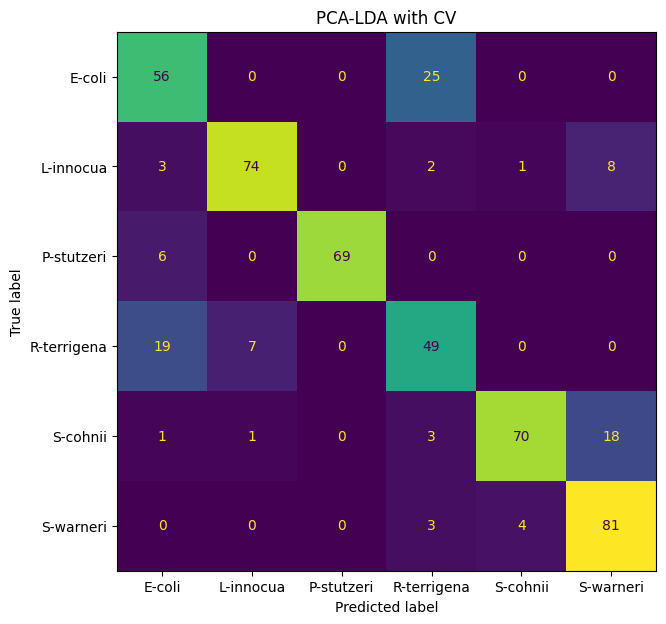

In [45]:
cls_model = Classify(spec, labels, batches)
acc, pred = cls_model.do_CV(nPC=10, method='LDA')

cmat_svm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat_svm, display_labels=np.unique(labels))
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
disp.plot(ax=ax, colorbar=False)
plt.title('PCA-LDA with CV')
plt.show()